In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
df = pd.read_csv("wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


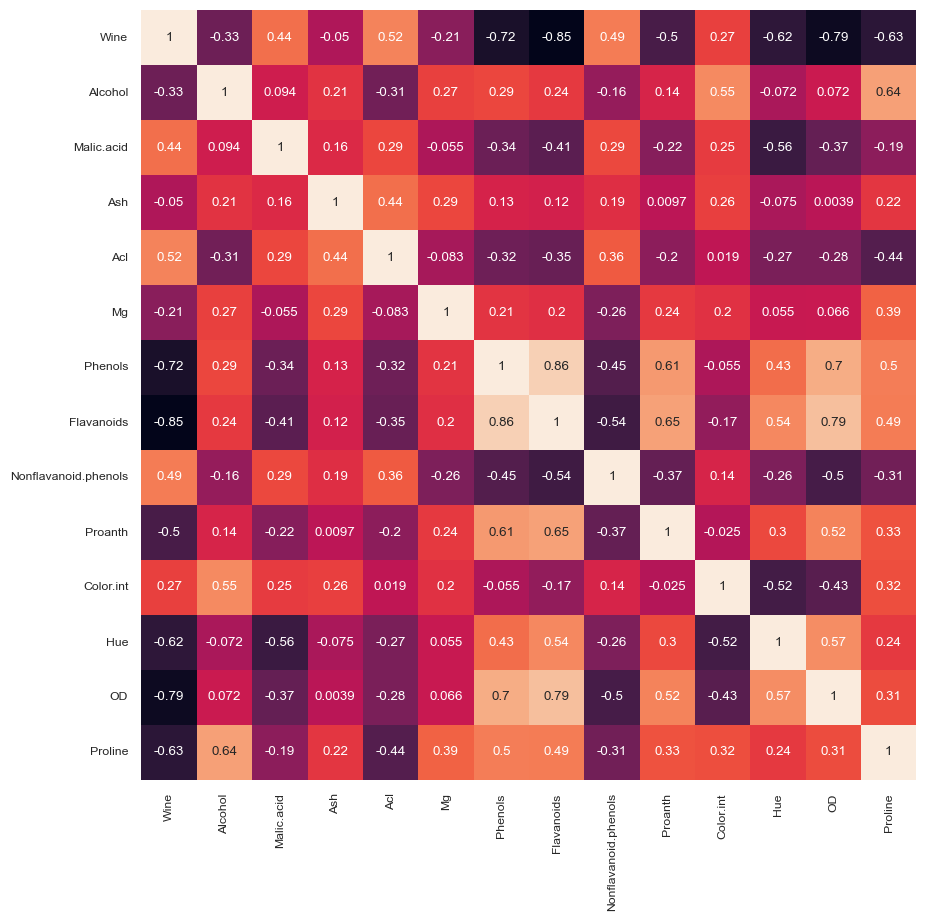

In [3]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
X = df.drop('Wine',axis=1)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
y = df['Wine']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

# 표준화
scaler = StandardScaler()

# 훈련 데이터에 맞춰 스케일링 적용 후 훈련 데이터 변환
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터는 훈련 데이터의 평균과 표준편차로 변환
X_test_scaled = scaler.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142, 13) (142,)
(36, 13) (36,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)
ly_preds = model.predict(X_test_scaled)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.047469433994287796


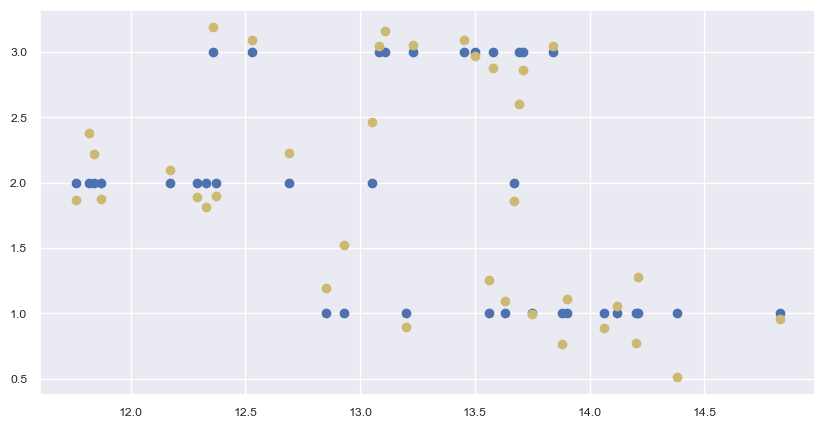

In [20]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Alcohol'], y_test, label='y_test')
plt.scatter(X_test['Alcohol'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test_scaled)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.3055555555555556


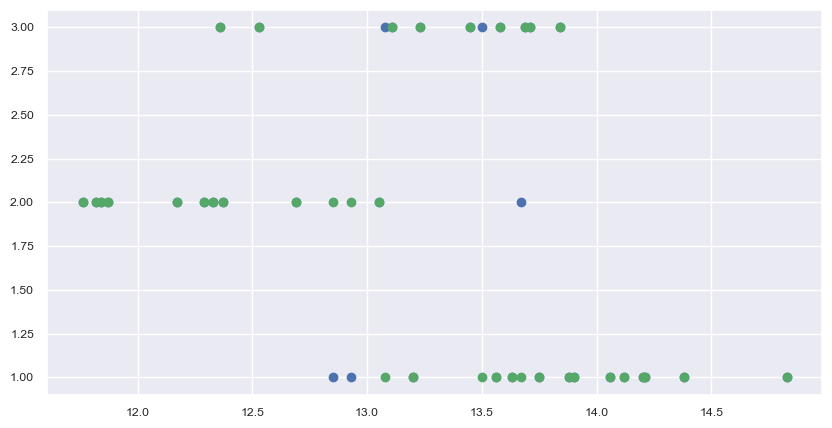

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Alcohol'], y_test, label='y_test')
plt.scatter(X_test['Alcohol'], dy_preds, c='g', label='dy_preds')
plt.show()        

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test_scaled)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.05845000000000003


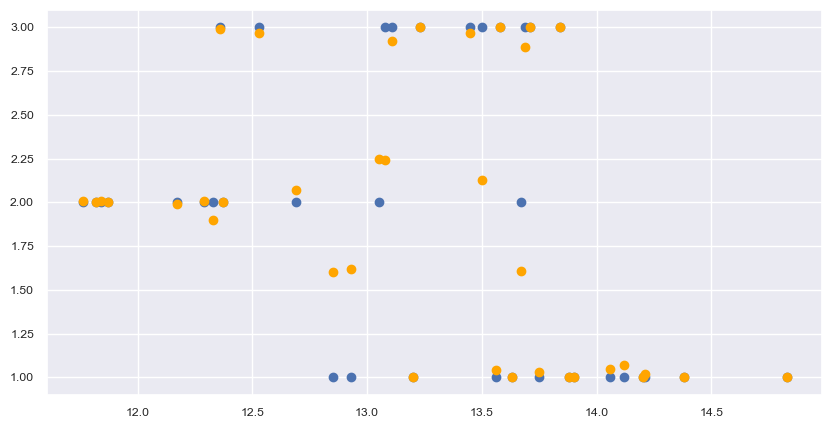

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Alcohol'], y_test, label='y_test')
plt.scatter(X_test['Alcohol'], ry_preds, c='orange', label='ry_preds')

plt.show()   

In [23]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test_scaled)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.05118682035666239


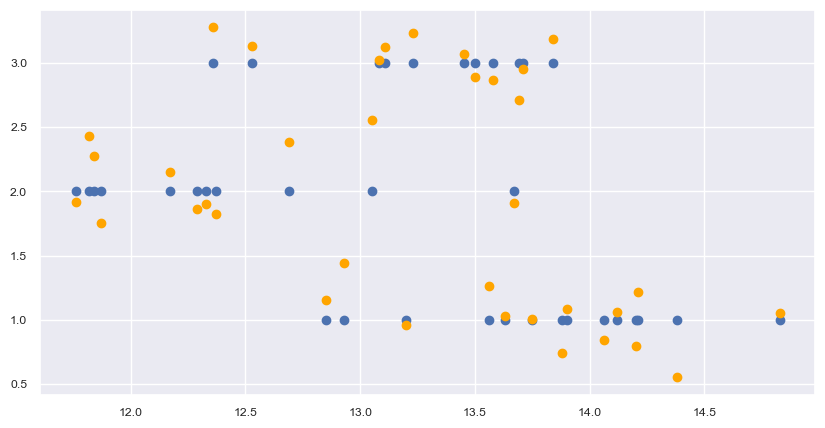

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Alcohol'], y_test, label='y_test')
plt.scatter(X_test['Alcohol'], ry_preds, c='orange', label='ry_preds')

plt.show()    

In [24]:
Y = pd.get_dummies(y).values.astype(int) # 원핫인코딩

In [25]:
X = X.values # 딥러닝 입력을 위해 Numpy로 변환

In [26]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [28]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [39]:
scaler = StandardScaler()

# 훈련 데이터에 맞춰 스케일링 적용 후 훈련 데이터 변환
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터는 훈련 데이터의 평균과 표준편차로 변환
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((142, 13), (142, 3), (36, 13), (36, 3))

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(13,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = Adam(learning_rate=0.001), loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,343 (5.25 KB)

 Trainable params: 1,343 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 842.9879 - mse: 842.9879 - val_loss: 31.4881 - val_mse: 31.4881
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.2742 - mse: 19.2742 - val_loss: 94.4213 - val_mse: 94.4213
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98.4011 - mse: 98.4011 - val_loss: 101.9745 - val_mse: 101.9745
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64.6778 - mse: 64.6778 - val_loss: 11.4309 - val_mse: 11.4309
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2092 - mse: 5.2092 - val_loss: 10.4883 - val_mse: 10.4883
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.0546 - mse: 14.0546 - val_loss: 22.9383 - val_mse: 22.9383
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.5626 - mse: 17.5626 - val_loss: 4.0021 - val_mse: 4.0021
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9676 - mse: 1.9676 - val_loss: 2.2801 - val_mse: 2.2801
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0

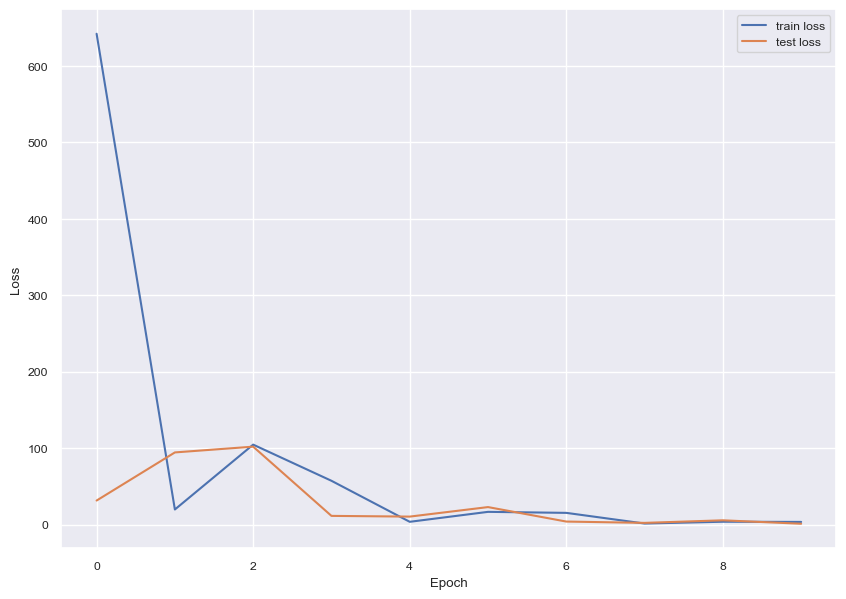

In [49]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1451 - mse: 1.1451


[1.1416429281234741, 1.1416429281234741]